In [1]:
import os
import sys; sys.path.append('..')
import torch
# from torch.autograd import grad
import transformers
device = 'cuda:1'
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_tokenizer_pair():
    # encoder_tok = transformers.BertTokenizerFast.from_pretrained('bert-base-uncased')
    encoder_tok = transformers.AutoTokenizer.from_pretrained('gpt2')
    decoder_tok = transformers.AutoTokenizer.from_pretrained('uer/gpt2-chinese-cluecorpussmall')
    return encoder_tok, decoder_tok

source_tok, target_tok = load_tokenizer_pair()

In [3]:
def word2emb(wordstr, tokenizer, embedding):
    ids = torch.tensor([tokenizer.convert_tokens_to_ids(target_tok.tokenize(wordstr))], device=device)
    emb = embedding(ids).mean(dim=1).squeeze(dim=0)
    return emb

In [54]:
# def word2emb(wordstr, tokenizer, encoder):
#     ids = torch.tensor([tokenizer.convert_tokens_to_ids(target_tok.tokenize(wordstr))], device=device)
#     output = encoder(input_ids=ids)
#     return output.last_hidden_state[0].mean(dim=0)

# Same translation

In [41]:
target_tok.decode(model.generate(input_ids=source_tok('Adopted by the Security Council at', return_tensors='pt').input_ids.to(device))[0])

'[CLS] 安 全 理 事 会 通 过 的 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
str.zfill()

In [47]:
translate = False
same = False

if same:
    en_wordpairs = [line.strip().split(',') for line in open('sametranslation_words.txt', 'rt').readlines()]
else:
    en_wordpairs = [line.strip().split(',') for line in open('difftranslation_words.txt', 'rt').readlines()]

if translate:
    dirpath = '../ckp/en_zh_finetune.after_en_finetune.wordemb_only/'
else:
    dirpath = '../ckp/finetune.gpt2_wordemb_only.en/'

simtable = {}

files = [f for f in os.listdir(dirpath) if f.endswith('.pt')]
maxlen = max([len(file) for file in files])

for file in files:
    print(file, end=' ')
    if translate:
        model = torch.load(f'{dirpath}/{file}', map_location=device)
        encoder_wordemb = model.encoder.wte
    else:
        model = torch.load(f'{dirpath}/{file}', map_location=device)
        encoder_wordemb = model.transformer.wte
    sim = []
    for word1, word2 in en_wordpairs:
        src0_emb = word2emb(word1, source_tok, encoder_wordemb)
        src1_emb = word2emb(word2, source_tok, encoder_wordemb)

        cos = src0_emb @ src1_emb / src0_emb.norm() / src1_emb.norm()
        sim.append(cos.item())
    simtable[file.zfill(maxlen)] = sim

simtable = pd.DataFrame(simtable, index=['_'.join(pair) for pair in en_wordpairs]).T
simtable = simtable.sort_index()
if translate:
    if same:
        simtable.to_csv(f'{dirpath}/en_zh.sametranslation_wordsim.csv')
    else:
        simtable.to_csv(f'{dirpath}/en_zh.difftranslation_wordsim.csv')
else:
    if same:
        simtable.to_csv(f'{dirpath}/en.sametranslation_wordsim.csv')
    else:
        simtable.to_csv(f'{dirpath}/en.difftranslation_wordsim.csv')
simtable

60000.pt 35000.pt 15000.pt 70000.pt 20000.pt 10000.pt 85000.pt 50000.pt 05000.pt 80000.pt 55000.pt 65000.pt 100000.pt 25000.pt 75000.pt 95000.pt 00000.pt 40000.pt 90000.pt 45000.pt 30000.pt 

,matter_value,surface_history,society_moment,delay_century,union_space,science_range,separate_thick,shelter_technique,solid_different,favor_struggle,...,deny_hurry,cry_revenue,award_extend,aspect_variable,worship_quantity,split_reserve,survival_network,mature_logical,cast_raise,core_branc
000000.pt,0.202055,0.340948,0.711322,0.702944,0.256649,0.292962,0.916786,0.715135,0.880015,0.835071,...,0.630763,0.253716,0.900874,0.686588,0.909310,0.858335,0.302549,0.644319,0.665431,0.280270
005000.pt,0.143711,0.332930,0.681029,0.667113,0.261134,0.271291,0.887696,0.649028,0.850617,0.794505,...,0.596453,0.246050,0.881573,0.644282,0.866521,0.821304,0.278810,0.607222,0.617285,0.243538
010000.pt,0.143545,0.328373,0.676224,0.661470,0.248165,0.267367,0.883966,0.654981,0.842154,0.789223,...,0.594518,0.239692,0.872860,0.641307,0.861280,0.818539,0.274701,0.607943,0.616742,0.240860
015000.pt,0.134218,0.329143,0.697698,0.690483,0.241135,0.271924,0.892913,0.681056,0.860399,0.809917,...,0.611753,0.234536,0.886219,0.663680,0.871001,0.832083,0.272070,0.626362,0.651546,0.221158
020000.pt,0.105101,0.325774,0.731416,0.726992,0.241944,0.262860,0.910183,0.723773,0.882965,0.845698,...,0.645751,0.221468,0.909953,0.696320,0.890701,0.855043,0.252448,0.668568,0.675875,0.190492
025000.pt,0.101784,0.307726,0.766418,0.769157,0.244915,0.251987,0.919242,0.754438,0.907280,0.864047,...,0.675698,0.214875,0.924931,0.738341,0.910075,0.866553,0.249478,0.706727,0.680826,0.167379
030000.pt,0.102031,0.314105,0.775111,0.777649,0.222020,0.249343,0.929717,0.775662,0.916376,0.880011,...,0.685054,0.193807,0.930847,0.780928,0.913961,0.879002,0.235794,0.722540,0.708162,0.114382
035000.pt,0.127469,0.325683,0.773521,0.777513,0.195361,0.257483,0.925435,0.743377,0.913926,0.871667,...,0.672142,0.214269,0.926799,0.755591,0.911492,0.871386,0.250404,0.712582,0.679700,0.120571
040000.pt,0.123932,0.306985,0.781831,0.790914,0.204887,0.250603,0.926613,0.741113,0.911331,0.878454,...,0.701377,0.198777,0.928964,0.773373,0.914560,0.878805,0.246386,0.723194,0.679329,0.130786
045000.pt,0.133769,0.360250,0.805092,0.811916,0.197786,0.244078,0.939465,0.780542,0.920143,0.898004,...,0.715625,0.226442,0.940738,0.783038,0.927935,0.893844,0.263160,0.761887,0.717096,0.121079


1 0.3875
2 0.175
3 0.1
4 0.1125
5 0.05
6 0.075
7 0.05
8 0.05
9 0.075
10 0.075


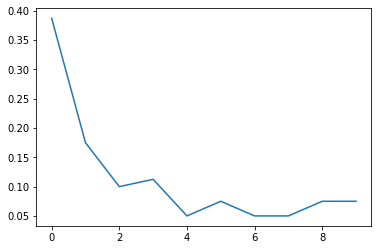

In [42]:
bandwidth = -0.001

diffs = []
for i in range(1, len(files)):
    diff = (simtable.iloc[i] - simtable.iloc[0])
    diff = (diff.loc[diff.abs() >= bandwidth] > 0).mean()
    print(i, diff)
    diffs.append(diff)

plt.plot(diffs)

In [43]:
for i in range(1, 11):
    print(i, (simtable.loc[i] > simtable.loc[0]).mean(), (simtable.loc[i] - simtable.loc[0]).mean())

1 0.2125 -0.004952817223966122
2 0.15 -0.011346516944468022
3 0.1375 -0.01567148882895708
4 0.15 -0.018882248923182486
5 0.1125 -0.02474548052996397
6 0.0875 -0.030189087614417076
7 0.075 -0.03372336495667696
8 0.05 -0.03747960217297077
9 0.0625 -0.03981491504237056
10 0.0625 -0.04473647121340037


In [46]:
for i in range(1, 11):
    print(i, (simtable.loc[i] > simtable.loc[0]).mean(), (simtable.loc[i] - simtable.loc[0]).mean())

1 0.2 -0.008646057918667793
2 0.1625 -0.011581656895577908
3 0.0875 -0.01794289518147707
4 0.05 -0.020350863598287104
5 0.075 -0.025667266361415385
6 0.0375 -0.03089669868350029
7 0.0875 -0.03415926080197096
8 0.025 -0.03614781722426415
9 0.025 -0.03912817779928446
10 0.0125 -0.043898466415703295


In [13]:
en_wordpairs = [line.strip().split(',') for line in open('sametranslation_words.txt', 'rt').readlines()]
dirpath = '../ckp/zh_en_finetune.1000iter/'

simtable = {}
for i in range(11):
    decoder_wordemb = torch.load(f'{dirpath}/0{i:0>2}00.decoder_wordemb.pt', map_location=device)
    sim = []
    for word1, word2 in en_wordpairs:
        src0_emb = word2emb(word1, source_tok, decoder_wordemb)
        src1_emb = word2emb(word2, source_tok, decoder_wordemb)

        cos = src0_emb @ src1_emb / src0_emb.norm() / src1_emb.norm()
        sim.append(cos.item())
    simtable[i] = sim

simtable = pd.DataFrame(simtable, index=['_'.join(pair) for pair in en_wordpairs]).T
simtable.to_csv(f'{dirpath}/zh_en.sametranslation_wordsim.csv')
simtable

,ability_competence,chance_opportunity,day_date,danger_risk,force_power,goal_aim,home_family,hope_wish,mistake_error,practice_exercise,...,exist_live,estimate_evaluate,find_discover,organize_arrange,plan_design,reality_truth,receive_accept,tell_inform,anxious_worried,noisy_loud
0,0.614724,0.601071,0.332346,0.536509,0.358307,0.487317,0.361133,0.308228,0.420212,0.631950,...,0.207196,0.637766,0.333293,0.650548,0.373715,0.445783,0.449460,0.562064,0.609474,0.492827
1,0.612883,0.603801,0.329388,0.539991,0.354986,0.482197,0.361517,0.316763,0.424960,0.633453,...,0.218352,0.637416,0.336049,0.652615,0.367415,0.441045,0.451621,0.556272,0.603094,0.487304
2,0.610274,0.598520,0.328277,0.530261,0.347264,0.472878,0.351743,0.320820,0.427704,0.627339,...,0.211916,0.634524,0.311852,0.652478,0.363592,0.438664,0.437674,0.555511,0.595646,0.483169
3,0.612510,0.631236,0.329002,0.570900,0.333705,0.480395,0.371600,0.374979,0.485588,0.661880,...,0.220961,0.653199,0.326544,0.668714,0.367322,0.442173,0.448036,0.561033,0.612754,0.487788
4,0.601130,0.636928,0.319460,0.564225,0.334236,0.462607,0.384978,0.372945,0.490367,0.657124,...,0.213362,0.662262,0.356657,0.676246,0.374555,0.438070,0.438784,0.567181,0.617420,0.480545
5,0.614051,0.655002,0.338985,0.546277,0.342553,0.460416,0.335048,0.349572,0.500051,0.659128,...,0.223246,0.618331,0.341957,0.667802,0.349944,0.438138,0.444553,0.544738,0.598927,0.476883
6,0.613899,0.651539,0.336397,0.546616,0.330495,0.456292,0.350812,0.368205,0.511096,0.661260,...,0.228528,0.630837,0.346208,0.664938,0.348190,0.439272,0.445091,0.545125,0.598143,0.468099
7,0.615706,0.650296,0.336035,0.552635,0.337135,0.457837,0.352439,0.345920,0.499540,0.665254,...,0.230792,0.635860,0.337373,0.669787,0.343227,0.437665,0.456292,0.539720,0.603617,0.486383
8,0.615469,0.657446,0.339282,0.540291,0.334623,0.457665,0.354985,0.347797,0.486365,0.662906,...,0.229699,0.631973,0.347515,0.667395,0.346200,0.440618,0.452120,0.541420,0.604061,0.469453
9,0.615390,0.655224,0.339939,0.542110,0.334954,0.457272,0.357120,0.347856,0.485333,0.663107,...,0.229037,0.632725,0.343855,0.669011,0.351457,0.442546,0.447611,0.545456,0.606103,0.470500


# Different translation

In [14]:
en_wordpairs = [line.strip().split(',') for line in open('difftranslation_words.txt', 'rt').readlines()]
dirpath = '../ckp/en_zh_finetune.1000iter/'

simtable = {}
for i in range(11):
    encoder_wordemb = torch.load(f'{dirpath}/0{i:0>2}00.encoder_wordemb.pt', map_location=device)
    sim = []
    for word1, word2 in en_wordpairs:
        src0_emb = word2emb(word1, source_tok, encoder_wordemb)
        src1_emb = word2emb(word2, source_tok, encoder_wordemb)

        cos = src0_emb @ src1_emb / src0_emb.norm() / src1_emb.norm()
        sim.append(cos.item())
    simtable[i] = sim

simtable = pd.DataFrame(simtable, index=['_'.join(pair) for pair in en_wordpairs]).T
simtable.to_csv(f'{dirpath}/en_zh.difftranslation_wordsim.csv')
simtable

,matter_value,surface_history,society_moment,delay_century,union_space,science_range,separate_thick,shelter_technique,solid_different,favor_struggle,...,deny_hurry,cry_revenue,award_extend,aspect_variable,worship_quantity,split_reserve,survival_network,mature_logical,cast_raise,core_branc
0,0.267193,0.215696,0.293058,0.564680,0.226750,0.338206,0.630412,0.544289,0.579061,0.628189,...,0.531715,0.376378,0.342387,0.497133,0.639156,0.622702,0.347698,0.457417,0.524609,0.370613
1,0.267169,0.215311,0.293192,0.564895,0.227288,0.337199,0.630325,0.544436,0.579752,0.627807,...,0.532087,0.376369,0.342708,0.496726,0.639212,0.623063,0.348206,0.457329,0.524335,0.368884
2,0.268492,0.214790,0.291721,0.563903,0.222473,0.331959,0.630575,0.544884,0.574507,0.624611,...,0.532026,0.376325,0.340431,0.495425,0.636582,0.622954,0.349356,0.454080,0.524273,0.368888
3,0.268492,0.214790,0.291720,0.563894,0.222472,0.331958,0.630575,0.544891,0.574506,0.624609,...,0.532026,0.376325,0.340430,0.495422,0.636581,0.622953,0.349355,0.454079,0.524284,0.368888
4,0.268493,0.214788,0.291720,0.563890,0.222473,0.331958,0.630575,0.544890,0.574505,0.624609,...,0.532026,0.376324,0.340430,0.495422,0.636581,0.622952,0.349355,0.454077,0.524285,0.368887
5,0.268493,0.214788,0.291720,0.563888,0.222473,0.331958,0.630575,0.544890,0.574505,0.624609,...,0.532026,0.376324,0.340430,0.495422,0.636581,0.622952,0.349355,0.454077,0.524285,0.368887
6,0.268493,0.214787,0.291720,0.563888,0.222472,0.331958,0.630575,0.544890,0.574505,0.624609,...,0.532026,0.376324,0.340430,0.495422,0.636581,0.622952,0.349355,0.454077,0.524285,0.368887
7,0.268493,0.214786,0.291720,0.563888,0.222472,0.331959,0.630575,0.544890,0.574505,0.624609,...,0.532026,0.376324,0.340430,0.495422,0.636581,0.622952,0.349355,0.454077,0.524285,0.368887
8,0.268493,0.214786,0.291720,0.563888,0.222472,0.331958,0.630575,0.544890,0.574505,0.624609,...,0.532026,0.376325,0.340430,0.495422,0.636581,0.622952,0.349355,0.454077,0.524285,0.368886
9,0.268493,0.214786,0.291720,0.563888,0.222472,0.331958,0.630575,0.544890,0.574505,0.624609,...,0.532026,0.376325,0.340430,0.495422,0.636581,0.622952,0.349355,0.454077,0.524285,0.368886


In [15]:
en_wordpairs = [line.strip().split(',') for line in open('difftranslation_words.txt', 'rt').readlines()]
dirpath = '../ckp/zh_en_finetune.1000iter/'

simtable = {}
for i in range(11):
    decoder_wordemb = torch.load(f'{dirpath}/0{i:0>2}00.decoder_wordemb.pt', map_location=device)
    sim = []
    for word1, word2 in en_wordpairs:
        src0_emb = word2emb(word1, source_tok, decoder_wordemb)
        src1_emb = word2emb(word2, source_tok, decoder_wordemb)

        cos = src0_emb @ src1_emb / src0_emb.norm() / src1_emb.norm()
        sim.append(cos.item())
    simtable[i] = sim

simtable = pd.DataFrame(simtable, index=['_'.join(pair) for pair in en_wordpairs]).T
simtable.to_csv(f'{dirpath}/zh_en.difftranslation_wordsim.csv')
simtable

,matter_value,surface_history,society_moment,delay_century,union_space,science_range,separate_thick,shelter_technique,solid_different,favor_struggle,...,deny_hurry,cry_revenue,award_extend,aspect_variable,worship_quantity,split_reserve,survival_network,mature_logical,cast_raise,core_branc
0,0.267193,0.215696,0.293058,0.564680,0.226750,0.338206,0.630412,0.544289,0.579061,0.628189,...,0.531715,0.376378,0.342387,0.497133,0.639156,0.622702,0.347698,0.457417,0.524609,0.370613
1,0.267614,0.219385,0.293796,0.565613,0.220099,0.323374,0.626606,0.553879,0.583324,0.621591,...,0.532979,0.379617,0.351304,0.499545,0.637445,0.620640,0.339436,0.454506,0.524998,0.374503
2,0.266008,0.218976,0.283866,0.561017,0.216153,0.312139,0.624065,0.547027,0.576566,0.618378,...,0.532504,0.378705,0.358779,0.489151,0.632040,0.617268,0.333342,0.452068,0.526222,0.368521
3,0.291304,0.231541,0.280491,0.582275,0.212819,0.330393,0.622030,0.558053,0.597387,0.635243,...,0.576692,0.401828,0.387737,0.528420,0.649931,0.624761,0.349146,0.474836,0.558695,0.385604
4,0.318093,0.249136,0.293543,0.592184,0.227580,0.329154,0.635438,0.587448,0.601969,0.632482,...,0.589757,0.391167,0.404394,0.547032,0.643198,0.634507,0.369094,0.468826,0.557070,0.396854
5,0.287645,0.218921,0.299478,0.605502,0.197802,0.308007,0.631364,0.603453,0.602936,0.612941,...,0.594079,0.393303,0.410341,0.556581,0.640465,0.623599,0.319829,0.466715,0.548152,0.384910
6,0.287481,0.208629,0.294104,0.608805,0.195433,0.277796,0.628224,0.551114,0.598472,0.623766,...,0.580164,0.381722,0.399995,0.551435,0.644085,0.619934,0.333162,0.455201,0.544358,0.395498
7,0.261993,0.204779,0.301223,0.611249,0.196673,0.289548,0.627387,0.541303,0.601979,0.620674,...,0.564699,0.404708,0.419487,0.524495,0.651542,0.619130,0.317695,0.459714,0.541961,0.383305
8,0.280482,0.210208,0.291200,0.613105,0.210327,0.299781,0.626733,0.543586,0.598037,0.621440,...,0.569670,0.390768,0.391238,0.526985,0.652657,0.621590,0.329491,0.460819,0.540227,0.378783
9,0.283847,0.214359,0.292535,0.610571,0.220472,0.312151,0.626948,0.537614,0.593392,0.620637,...,0.570632,0.392563,0.382829,0.526830,0.652410,0.623977,0.333717,0.462327,0.545329,0.382542


In [ ]:
en_wordpairs = [line.strip().split(',') for line in open('sametranslation_words.txt', 'rt').readlines()]
# en_wordpairs = [line.strip().split(',') for line in open('sametranslation_words.txt', 'rt').readlines()]
dirpath = '../ckp/finetune.gpt2.en/'

simtable = {}
for i in range(7):
    print(i, end=' ')
    model = torch.load(f'{dirpath}/{i*5:0>2}000.pt', map_location=device)
    # encoder_wordemb = model.encoder.wte
    encoder_wordemb = model.transformer.wte
    sim = []
    for word1, word2 in en_wordpairs:
        src0_emb = word2emb(word1, source_tok, encoder_wordemb)
        src1_emb = word2emb(word2, source_tok, encoder_wordemb)

        cos = src0_emb @ src1_emb / src0_emb.norm() / src1_emb.norm()
        sim.append(cos.item())
    simtable[i] = sim

simtable = pd.DataFrame(simtable, index=['_'.join(pair) for pair in en_wordpairs]).T
# simtable.to_csv(f'{dirpath}/en_zh.difftranslation_wordsim.csv')
simtable

0 1 2 3 4 5 6 

,ability_competence,chance_opportunity,day_date,danger_risk,force_power,goal_aim,home_family,hope_wish,mistake_error,practice_exercise,...,exist_live,estimate_evaluate,find_discover,organize_arrange,plan_design,reality_truth,receive_accept,tell_inform,anxious_worried,noisy_loud
0,0.891641,0.674507,0.429030,0.668237,0.403808,0.620048,0.382209,0.677306,0.298211,0.830585,...,0.364129,0.801485,0.308255,0.840185,0.341629,0.717498,0.745479,0.597018,0.896467,0.746114
1,0.855885,0.654043,0.420787,0.638187,0.384954,0.553536,0.410004,0.654840,0.334994,0.779979,...,0.352285,0.763716,0.329698,0.793534,0.339091,0.661265,0.687356,0.607333,0.849519,0.727224
2,0.860113,0.667387,0.415116,0.664953,0.398350,0.566044,0.448979,0.636022,0.340876,0.796378,...,0.362402,0.779746,0.331570,0.796819,0.353092,0.668754,0.712598,0.640617,0.849486,0.723061
3,0.828360,0.642990,0.377325,0.639234,0.414103,0.510912,0.483558,0.601760,0.316662,0.742806,...,0.333489,0.757498,0.313902,0.748216,0.333263,0.662682,0.653962,0.654005,0.820714,0.643043
4,0.801275,0.629304,0.292865,0.612719,0.355943,0.498114,0.486796,0.611618,0.329785,0.741538,...,0.293859,0.724918,0.305191,0.712475,0.314997,0.602621,0.619594,0.616020,0.785194,0.641616
5,0.803902,0.660395,0.264474,0.616604,0.334905,0.506007,0.477344,0.639237,0.337263,0.759595,...,0.336660,0.738725,0.356390,0.725102,0.295441,0.629231,0.620702,0.617786,0.779234,0.647887
6,0.816250,0.696463,0.264828,0.617768,0.290630,0.492951,0.477902,0.635744,0.325546,0.775466,...,0.323788,0.735504,0.384671,0.735085,0.275643,0.624747,0.618018,0.625803,0.787387,0.649059
